In [1]:
import torchvision
from pathlib import Path
import zipfile


train_data = torchvision.datasets.Food101(root=data_dir,
                                          split="train",
                                          download=True                                            
                                         )
test_data = torchvision.datasets.Food101(root,
                                        split="test",
                                        download=True)



In [2]:
import requests

data_path = Path("D:\Pytorch_data")
image_path = data_path/"pizza_steak_sushi"



if image_path.is_dir():
    print("already downloaded")
else:
    image_path.mkdir(parents=True,exist_ok=True)
    print("directory not found,trying to download...")
    with open(data_path/"pizza_steak_sushi.zip","wb") as f:
        response = requests.get(r"https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(response.content)
        
    with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
        zip_ref.extractall(image_path)
        
    

already downloaded


In [3]:
import os

def walk_dir(dir_path):
    for dirpaths, dirnames, filenames in os.walk(image_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpaths}")
walk_dir(image_path)        

there are 2 directories and 0 images in D:\Pytorch_data\pizza_steak_sushi
there are 3 directories and 0 images in D:\Pytorch_data\pizza_steak_sushi\test
there are 0 directories and 25 images in D:\Pytorch_data\pizza_steak_sushi\test\pizza
there are 0 directories and 19 images in D:\Pytorch_data\pizza_steak_sushi\test\steak
there are 0 directories and 31 images in D:\Pytorch_data\pizza_steak_sushi\test\sushi
there are 3 directories and 0 images in D:\Pytorch_data\pizza_steak_sushi\train
there are 0 directories and 78 images in D:\Pytorch_data\pizza_steak_sushi\train\pizza
there are 0 directories and 75 images in D:\Pytorch_data\pizza_steak_sushi\train\steak
there are 0 directories and 72 images in D:\Pytorch_data\pizza_steak_sushi\train\sushi


In [4]:
import random

random.seed(46)
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
image_class

'steak'

random_image_path: D:\Pytorch_data\pizza_steak_sushi\test\steak\502076.jpg
random_image: steak
image height: 512
image width: 512


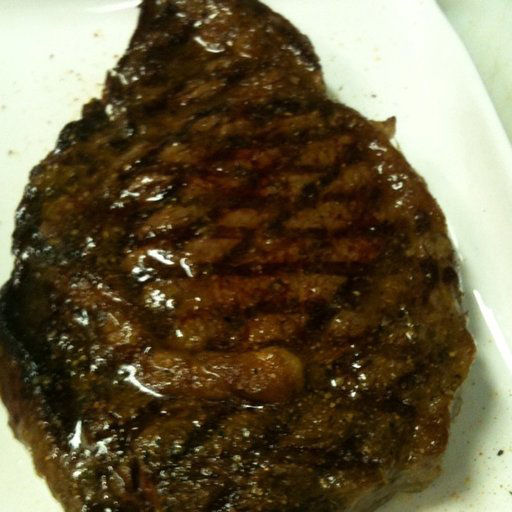

In [5]:
try:
    from PIL import Image
except:
    !pip install PIL
    
img = Image.open(random_image_path)
print(f"random_image_path: {random_image_path}")
print(f"random_image: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

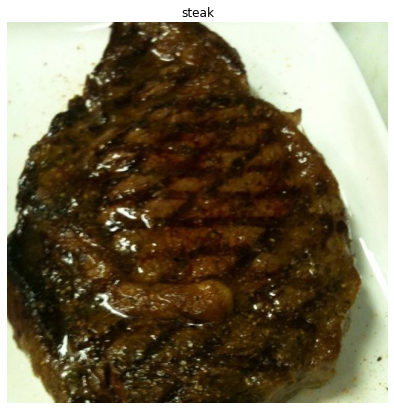

In [6]:
###we can do it with numpy as well
import numpy as np
import matplotlib.pyplot as plt

np_img = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(np_img)
plt.title(image_class)
plt.axis(False);

In [7]:
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import random

data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.RandomHorizontalFlip(p=0.5),
                                   transforms.ToTensor()])



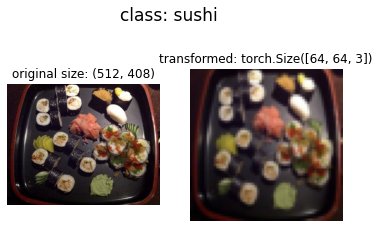

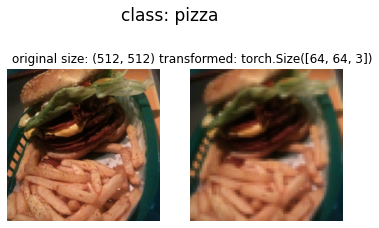

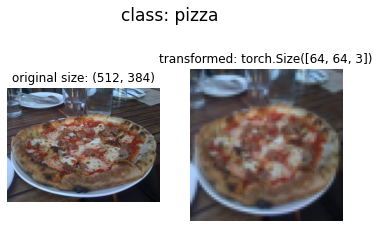

In [8]:
def plot_images(image_path_list,transform,n=3,seed=42):
    """
    plot images in a list    
    args:
    image_path_list:list
    transform:torchvision.transforms
    n:int
    seed:int
    """
    random.seed(42)
    random_imgs = random.sample(image_path_list,k=n)
    for img in random_imgs:
        with Image.open(img) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"original size: {f.size}")
            ax[0].axis(False)
            
            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"transformed: {transformed_img.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"class: {img.parent.stem}", fontsize=17)
        
plot_images(image_path_list,data_transform)        
    
    

In [9]:
from torchvision import datasets
from pathlib import Path

data_dir = Path("D:\Pytorch_data\pizza_steak_sushi")
train_dir = data_dir/"train"
test_dir = data_dir/"test"

train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                               transform=data_transform,
                               )

train_data



Dataset ImageFolder
    Number of datapoints: 225
    Root location: D:\Pytorch_data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [10]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [11]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [12]:
len(train_data),len(test_data)

(225, 75)

In [13]:
img,label = train_data[0][0], train_data[0][1]
print(f"image tensor: {img}")
print(f"image type: {img.dtype}")
print(f"image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

image tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

(-0.5, 63.5, 63.5, -0.5)

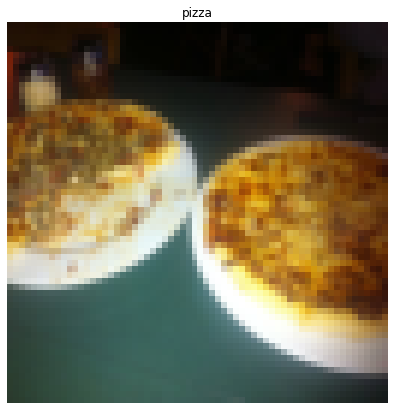

In [14]:
numpy_img = img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(numpy_img)
plt.title(class_names[label])
plt.axis(False)

In [15]:
from torch.utils.data import DataLoader
import os

train_dataloader = DataLoader(dataset=train_data,
                         batch_size=4,
                         shuffle=True,
                         num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                        batch_size=4,
                        num_workers=os.cpu_count())

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f16bad9820>,
 <torch.utils.data.dataloader.DataLoader at 0x1f16ba63e50>)

In [16]:
img,label = next(iter(train_dataloader))
img.shape,label.shape

(torch.Size([4, 3, 64, 64]), torch.Size([4]))

In [17]:
###manually settin up Imagedata
import os
from pathlib import Path
from typing import Dict,Tuple,List
import torch


# train_dir = Path("D:\Pytorch_data\pizza_steak_sushi")/"train"
train_dir = os.path.join("D:\Pytorch_data\pizza_steak_sushi","train")
test_dir = os.path.join("D:\Pytorch_data\pizza_steak_sushi","test")
class_names = [entry.name for entry in os.scandir(train_dir)]
class_names

['pizza', 'steak', 'sushi']

In [18]:
def find_classes(target_dir:str) -> Tuple[List[str], Dict[str,int]]:
    
    classes = [entry.name for entry in os.scandir(target_dir) if entry.is_dir()]
    if not classes:
        raise FileNotFoundError(f"file does not exist in {target_dir}")
            
    class_to_idx = {cls:idx for idx,cls in enumerate(classes)}
    
    return classes,class_to_idx

train_dir = Path("D:\Pytorch_data\pizza_steak_sushi")/"train"

find_classes(train_dir)        
    

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [19]:
##just testing listdir vs scandir
[entry for entry in os.scandir(train_dir)],os.listdir(train_dir)


([<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>],
 ['pizza', 'steak', 'sushi'])

In [20]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self,target_dir:str,transform=None):
        self.paths = list(Path(target_dir).glob("*/*"))
        
        self.transform = transform
        
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    def load_img(self,idx:int) -> Image.Image:
        return Image.open(self.paths[idx])
    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self,idx:int) -> Tuple[torch.Tensor, int]:
        img = self.load_img(idx)
#         class_name = self.classes[idx]  ###this will error later in display_random_image function
        class_name = self.paths[idx].parent.name
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img),class_idx
        else:
            return img,class_idx
        

In [21]:
train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                   transforms.RandomHorizontalFlip(p=0.5),
                   transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                   transforms.ToTensor()])


In [22]:
train_data_custom = ImageFolderCustom(train_dir,train_transform)

test_data_custom = ImageFolderCustom(test_dir,test_transform)

train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x1f16bb16610>,
 <__main__.ImageFolderCustom at 0x1f16bb16b20>)

In [23]:
len(train_data_custom),len(test_data_custom)

(225, 75)

In [24]:
train_data_custom.classes,train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [26]:
X,y = next(iter(train_data_custom))
X.shape,y

(torch.Size([3, 64, 64]), 0)

In [27]:
paths = list(Path(r"D:\Pytorch_data\pizza_steak_sushi\test").glob("*/*"))
unique = []
for path in paths:
    if path.parent.stem not in unique:
        unique.append(path.parent.stem)
        
print(unique)
        
    


['pizza', 'steak', 'sushi']


In [28]:
def find_classes2(target_dir:str) -> Tuple[List[str],Dict[str,int]]:
    paths = list(Path(target_dir).glob("*/*"))
    classes = list(set([path.parent.stem for path in paths]))
    classes_to_idx = {cls:idx for idx,cls in enumerate(classes)}
    return classes,classes_to_idx
    
find_classes2(r"D:\Pytorch_data\pizza_steak_sushi\test")
    

(['sushi', 'steak', 'pizza'], {'sushi': 0, 'steak': 1, 'pizza': 2})

In [29]:
list(Path(r"D:\Pytorch_data\pizza_steak_sushi\test").glob("*"))

[WindowsPath('D:/Pytorch_data/pizza_steak_sushi/test/pizza'),
 WindowsPath('D:/Pytorch_data/pizza_steak_sushi/test/steak'),
 WindowsPath('D:/Pytorch_data/pizza_steak_sushi/test/sushi')]

In [30]:
[entry for entry in os.scandir(r"D:\Pytorch_data\pizza_steak_sushi\test")]

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [31]:
train_data_custom = ImageFolderCustom(train_dir,train_transform)

test_data_custom = ImageFolderCustom(test_dir,test_transform)

train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x1f16bb89bb0>,
 <__main__.ImageFolderCustom at 0x1f16bb897f0>)

In [32]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

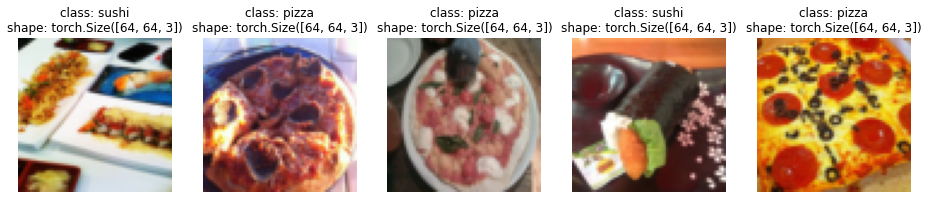

In [33]:
def display_random_images(dataset,classes = None,n=10,display_shape=True,seed=None):
    if n>10:
        n=10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    if seed:
        random.seed(seed)
        
    random_samples_idx = random.sample(range(len(dataset)),k=n)
    
    plt.figure(figsize=(16,8))
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]
        
        adjusted_img = targ_image.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(adjusted_img)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {adjusted_img.shape}"
        plt.title(title)
        
display_random_images(train_data_custom,classes=train_data_custom.classes,seed=42,n=5)

In [34]:
from torch.utils.data import DataLoader
import os

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                    batch_size=4,
                                    num_workers=0,
                                    shuffle= True)

test_dataloader_custom = DataLoader(test_data_custom,
                                   batch_size=4,
                                   shuffle=False,
                                   num_workers=0
                                   )

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1f16b9fa820>,
 <torch.utils.data.dataloader.DataLoader at 0x1f16b8f4bb0>)

In [35]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([4, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([4])


In [36]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()])

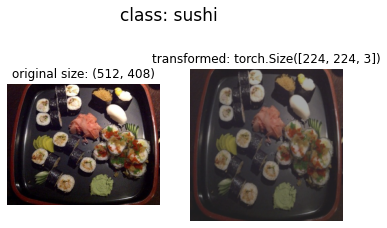

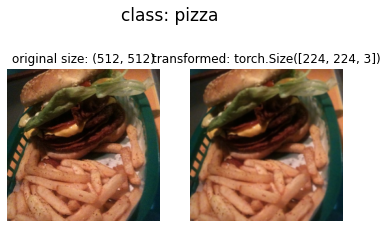

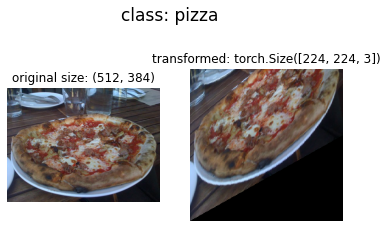

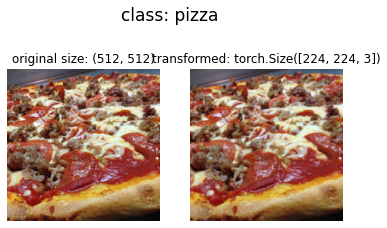

In [37]:
image_path_list = list(image_path.glob("*/*/*"))
plot_images(image_path_list,transform=train_transforms,n=4,seed=42)